1. Data Loading and Initial Exploration

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the customer loan prediction training dataset
df = pd.read_csv("Customer_Loan_Prediction_Train.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
# Display information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


2. Handling Missing Values

In [4]:
# Check for missing values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
# Fill missing values with the mode (most frequent value) for each column
for i in df:
    df[i].fillna(df[i].mode()[0], inplace=True)

In [6]:
# Check if there are any remaining missing values
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

3. Data Segmentation by Loan Status

In [7]:
# Separate the data based on Loan_Status
df_0 = df[df["Loan_Status"] == "N"]
df_1 = df[df["Loan_Status"] == "Y"]

4. Gender Distribution

In [8]:
df_gender_0 = df_0["Gender"]
df_gender_1 = df_1["Gender"]

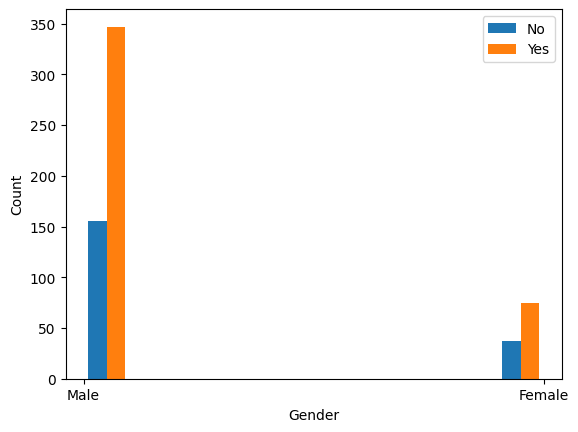

In [9]:
# Plot histograms for gender distribution
plt.hist([df_gender_0, df_gender_1], label=["No", "Yes"])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend()
plt.show()

Graph Interpretation:

- Observation: From the graph, we see that gender does not significantly affect the loan approval process, as both males and females have almost the same chances of obtaining a loan.

- Additional Insights:

    - This suggests that gender equality is being maintained in the loan approval process, which could be beneficial for institutions aiming to promote fair lending practices.
    - This analysis could inform future studies on bias in lending, ensuring that no gender-based discrimination occurs.

5. Marital Status Distribution

In [10]:
df_married_0 = df_0["Married"]
df_married_1 = df_1["Married"]

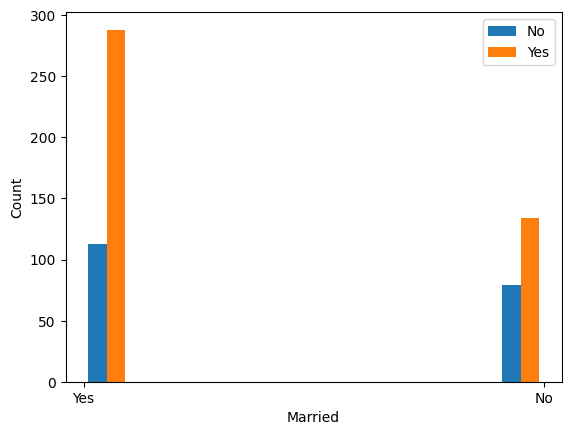

In [11]:
# Plot histograms for marital status distribution
plt.hist([df_married_0,df_married_1], label = ["No","Yes"])
plt.xlabel('Married')
plt.ylabel('Count')
plt.legend()
plt.show()

Graph Interpretation:

- Observation: Married individuals are more likely to be approved for a loan than unmarried individuals, as the count of loans granted to married applicants is higher.

- Additional Insights:

    - This could suggest that financial institutions might see married individuals as more financially stable or more likely to have a reliable income stream.
    - Married applicants may also have joint income and assets, which could influence the likelihood of loan approval.
    - Future models could factor in marital status as an important predictor for loan eligibility.

6. Dependents and Loan Approval

In [12]:
df_dependents_0 = df_0["Dependents"]
df_dependents_1 = df_1["Dependents"]

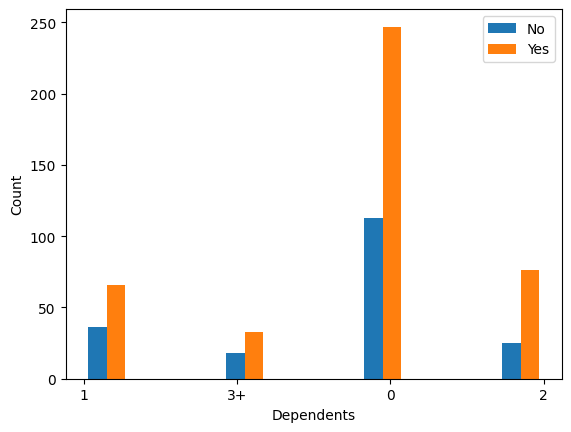

In [13]:
# Plot histograms for dependents distribution
plt.hist([df_dependents_0,df_dependents_1], label = ["No","Yes"])
plt.xlabel('Dependents')
plt.ylabel('Count')
plt.legend()
plt.show()

Graph Interpretation:

- Observation: Individuals with more dependents are more likely to apply for a loan. This indicates that larger families may need additional financial support, which results in more loan applications.

- Additional Insights:

    - The presence of dependents may be a proxy for household financial responsibility. Lenders may need to assess loan applicants' ability to handle additional financial burdens, including the responsibility of dependents.
    - Financial institutions could consider offering targeted products for families with dependents to meet their unique needs.

7. Education Level and Loan Approval

In [14]:
df_education_0 = df_0["Education"]
df_education_1 = df_1["Education"]

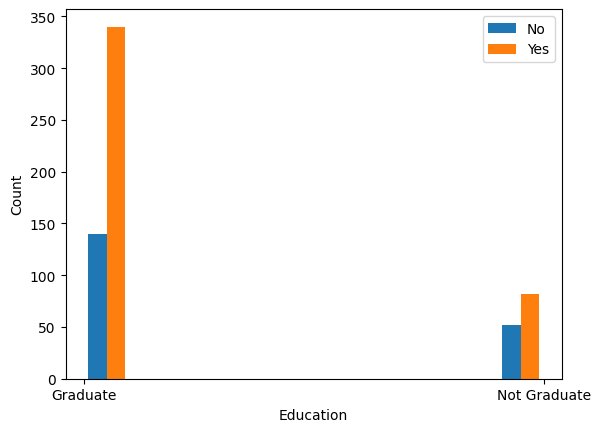

In [15]:
# Plot histograms for education distribution
plt.hist([df_education_0,df_education_1], label = ["No","Yes"])
plt.xlabel('Education')
plt.ylabel('Count')
plt.legend()
plt.show()

Graph Interpretation:

- Observation: Graduates are more likely to take out loans compared to non-graduates, suggesting that education plays a key role in loan approval.

- Additional Insights:

    - This could reflect a societal trend where higher education correlates with better job prospects, higher income, and financial stability, making graduates more reliable borrowers.
    - Loan institutions may consider offering education-related loans or specialized packages for graduates, targeting individuals with higher earning potential.

8. Self-Employed Status and Loan Approval

In [16]:
df_self_employed_0 = df_0["Self_Employed"]
df_self_employed_1 = df_1["Self_Employed"]

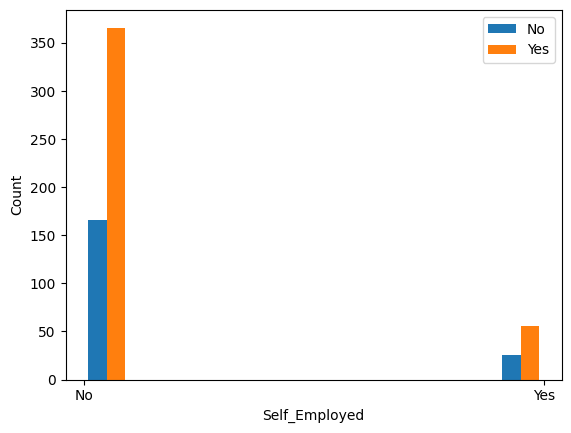

In [17]:
plt.hist([df_self_employed_0,df_self_employed_1], label = ["No","Yes"])
plt.xlabel('Self_Employed')
plt.ylabel('Count')
plt.legend()
plt.show()

Graph Interpretation:

- Observation: Being self-employed does not significantly impact the loan approval decision. Self-employed individuals have almost the same chances of getting a loan as those who are not self-employed.

- Additional Insights:

    - This could indicate that financial institutions are making loan decisions based on factors other than employment status, such as credit history or income stability.
    - It might also suggest that self-employed individuals are managing to maintain their financial credibility, potentially through consistent income or business success.
    - Further investigations could look into alternative income verification methods for self-employed applicants.

9. Property Area and Loan Approval

In [18]:
df_property_area_0 = df_0["Property_Area"]
df_property_area_1 = df_1["Property_Area"]

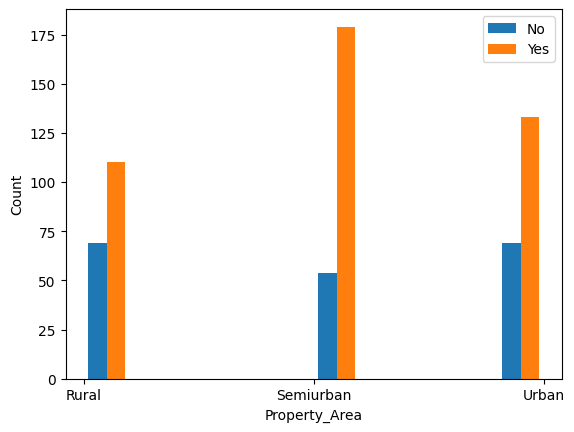

In [19]:
plt.hist([df_property_area_0,df_property_area_1], label = ["No","Yes"])
plt.xlabel('Property_Area')
plt.ylabel('Count')
plt.legend()
plt.show()

Graph Interpretation:

- Observation: Individuals residing in semi-urban areas are more likely to obtain a loan compared to those in urban or rural areas. Additionally, individuals residing in urban areas are more likely to obtain a loan than those in rural areas, but their likelihood of obtaining a loan is still less than those residing in semi-urban areas.

- Additional Insights:

    - This could reflect economic differences between rural, urban, and semi-urban areas. People in semi-urban areas may have better access to jobs, infrastructure, and financial services, making them more eligible for loans.
    - Financial institutions could target semi-urban populations for loan products based on this analysis.
    - Further investigation might be needed into regional economic trends, such as income disparities or job market conditions, to better understand these geographical trends.

10. Conclusion

In this analysis, we explored several customer attributes and their relationship with loan approval. Here are the key takeaways:
- Gender does not have a significant impact on loan approval.
- Marital Status: Married individuals are more likely to get approved for loans.
- Dependents: Customers with dependents are more likely to apply for loans.
- Education: Graduates have a higher likelihood of loan approval.
- Self-Employed: Self-employed status does not significantly affect loan approval.
- Property Area: Residents in semi-urban areas are more likely to be approved for loans compared to those in urban or rural areas.